In [62]:
import pandas as pd
import numpy as np

In [63]:
df = pd.read_csv("D:\HDHI Admission data.csv")

In [64]:
df['HB'].replace('EMPTY', np.nan, inplace=True)
df['TLC'].replace('EMPTY', np.nan, inplace=True)
df['PLATELETS'].replace('EMPTY', np.nan, inplace=True)
df['UREA'].replace('EMPTY', np.nan, inplace=True)
df['CREATININE'].replace('EMPTY', np.nan, inplace=True)
df['GLUCOSE'].replace('EMPTY', np.nan, inplace=True)

In [65]:
df.apply(pd.isnull).sum()

SNO                                   0
MRD No.                               0
D.O.A                                 0
D.O.D                                 0
AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
month year                            0
DURATION OF STAY                      0
duration of intensive unit stay       0
OUTCOME                               0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
HB                                  256
TLC                                 290
PLATELETS                           294
GLUCOSE                             945
UREA                                244
CREATININE                          251


In [66]:
null_pct = df.apply(pd.isnull).sum()/df.shape[0]
null_pct

SNO                                0.000000
MRD No.                            0.000000
D.O.A                              0.000000
D.O.D                              0.000000
AGE                                0.000000
GENDER                             0.000000
RURAL                              0.000000
TYPE OF ADMISSION-EMERGENCY/OPD    0.000000
month year                         0.000000
DURATION OF STAY                   0.000000
duration of intensive unit stay    0.000000
OUTCOME                            0.000000
SMOKING                            0.000000
ALCOHOL                            0.000000
DM                                 0.000000
HTN                                0.000000
CAD                                0.000000
PRIOR CMP                          0.000000
CKD                                0.000000
HB                                 0.016248
TLC                                0.018406
PLATELETS                          0.018660
GLUCOSE                         

In [67]:
valid_columns = df.columns[null_pct < .06]

In [68]:
valid_columns

Index(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING ', 'ALCOHOL',
       'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'RAISED CARDIAC ENZYMES',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION'],
      dtype='object')

In [69]:
df =  df[valid_columns].copy()

In [70]:
df =  df.ffill()
df.apply(pd.isnull).sum()

SNO                                0
MRD No.                            0
D.O.A                              0
D.O.D                              0
AGE                                0
GENDER                             0
RURAL                              0
TYPE OF ADMISSION-EMERGENCY/OPD    0
month year                         0
DURATION OF STAY                   0
duration of intensive unit stay    0
OUTCOME                            0
SMOKING                            0
ALCOHOL                            0
DM                                 0
HTN                                0
CAD                                0
PRIOR CMP                          0
CKD                                0
HB                                 0
TLC                                0
PLATELETS                          0
GLUCOSE                            0
UREA                               0
CREATININE                         0
RAISED CARDIAC ENZYMES             0
SEVERE ANAEMIA                     0
A

In [71]:
df.dtypes

SNO                                 int64
MRD No.                            object
D.O.A                              object
D.O.D                              object
AGE                                 int64
GENDER                             object
RURAL                              object
TYPE OF ADMISSION-EMERGENCY/OPD    object
month year                         object
DURATION OF STAY                    int64
duration of intensive unit stay     int64
OUTCOME                            object
SMOKING                             int64
ALCOHOL                             int64
DM                                  int64
HTN                                 int64
CAD                                 int64
PRIOR CMP                           int64
CKD                                 int64
HB                                 object
TLC                                object
PLATELETS                          object
GLUCOSE                            object
UREA                              

In [72]:
df.dtypes

SNO                                 int64
MRD No.                            object
D.O.A                              object
D.O.D                              object
AGE                                 int64
GENDER                             object
RURAL                              object
TYPE OF ADMISSION-EMERGENCY/OPD    object
month year                         object
DURATION OF STAY                    int64
duration of intensive unit stay     int64
OUTCOME                            object
SMOKING                             int64
ALCOHOL                             int64
DM                                  int64
HTN                                 int64
CAD                                 int64
PRIOR CMP                           int64
CKD                                 int64
HB                                 object
TLC                                object
PLATELETS                          object
GLUCOSE                            object
UREA                              

In [73]:
indep = df.drop(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY', 'duration of intensive unit stay', 'OUTCOME', 'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM', 'CHEST INFECTION'],axis='columns')





In [74]:
indep

,AGE,GENDER,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,RAISED CARDIAC ENZYMES
0,81,M,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1
1,65,M,0,1,0,1,1,0,0,13.7,9,149,112,18,0.9,0
2,53,M,0,0,1,0,1,0,0,10.6,14.7,329,187,93,2.3,0
3,67,F,0,0,0,1,1,0,0,12.8,9.9,286,130,27,0.6,0
4,60,F,0,0,0,1,0,1,0,13.6,9.1,26,144,55,1.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15751,86,F,0,0,1,1,1,0,0,8.8,13.7,361,131,57,1.4,1
15752,50,M,0,0,1,1,0,1,0,13.2,15.6,142,248,94,1.8,0
15753,82,M,0,0,0,1,1,0,0,9.3,11.7,372,210,67,1.9,0
15754,59,F,0,0,0,1,1,0,0,13.1,12.5,431,153,29,0.8,0


In [75]:
dept = df[['SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM', 'CHEST INFECTION']]

In [76]:
dept

,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,0,1,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15751,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15753,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
from sklearn.preprocessing import LabelEncoder
la_GENDER=LabelEncoder()

In [78]:
indep['GENDER_n']=la_GENDER.fit_transform(indep['GENDER'])

In [79]:
indep

,AGE,GENDER,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,RAISED CARDIAC ENZYMES,GENDER_n
0,81,M,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1,1
1,65,M,0,1,0,1,1,0,0,13.7,9,149,112,18,0.9,0,1
2,53,M,0,0,1,0,1,0,0,10.6,14.7,329,187,93,2.3,0,1
3,67,F,0,0,0,1,1,0,0,12.8,9.9,286,130,27,0.6,0,0
4,60,F,0,0,0,1,0,1,0,13.6,9.1,26,144,55,1.25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15751,86,F,0,0,1,1,1,0,0,8.8,13.7,361,131,57,1.4,1,0
15752,50,M,0,0,1,1,0,1,0,13.2,15.6,142,248,94,1.8,0,1
15753,82,M,0,0,0,1,1,0,0,9.3,11.7,372,210,67,1.9,0,1
15754,59,F,0,0,0,1,1,0,0,13.1,12.5,431,153,29,0.8,0,0


In [80]:
Indep_n = indep.drop('GENDER',axis='columns')

In [81]:
Indep_n

,AGE,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,RAISED CARDIAC ENZYMES,GENDER_n
0,81,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1,1
1,65,0,1,0,1,1,0,0,13.7,9,149,112,18,0.9,0,1
2,53,0,0,1,0,1,0,0,10.6,14.7,329,187,93,2.3,0,1
3,67,0,0,0,1,1,0,0,12.8,9.9,286,130,27,0.6,0,0
4,60,0,0,0,1,0,1,0,13.6,9.1,26,144,55,1.25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15751,86,0,0,1,1,1,0,0,8.8,13.7,361,131,57,1.4,1,0
15752,50,0,0,1,1,0,1,0,13.2,15.6,142,248,94,1.8,0,1
15753,82,0,0,0,1,1,0,0,9.3,11.7,372,210,67,1.9,0,1
15754,59,0,0,0,1,1,0,0,13.1,12.5,431,153,29,0.8,0,0


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier

X = Indep_n[['AGE', 'SMOKING ', 'ALCOHOL', 'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'RAISED CARDIAC ENZYMES', 'GENDER_n']]
y = dept[['SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM', 'CHEST INFECTION']]  # Replace with your actual target columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


classifier = DecisionTreeClassifier()


model = MultiOutputClassifier(classifier)


model.fit(X_train, y_train)


predictions = model.predict(X_test)




In [89]:
predictions

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [90]:
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier(random_state=42)


param_grid = {
    'max_depth': [None, 10, 20, 30],  # Adjust maximum depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples in a leaf node
}


grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_


best_classifier = DecisionTreeClassifier(random_state=42, **best_params)
best_classifier.fit(X_train, y_train)


accuracy = best_classifier.score(X_test, y_test)
print(f"Best Model Accuracy: {accuracy:.2f}")


Best Model Accuracy: 0.21


In [92]:
model.score(Indep_n,dept)

0.8274308200050774

In [93]:
pd = model.predict([[81,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1,1]])

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\bas

In [94]:
pd

array([[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int64)

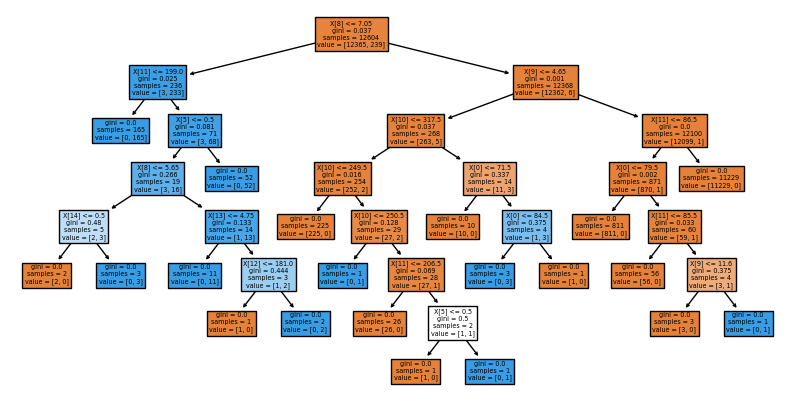

In [59]:
from sklearn import tree
import matplotlib.pyplot as plt


tree_estimator = model.estimators_[0]  

fig, ax = plt.subplots(figsize=(10, 5))  
tree.plot_tree(tree_estimator, filled=True, ax=ax)
plt.show()

In [95]:
ns = model.predict([[20,0,0,0,0,0,0,0,9.5,16.1,337,80,34,0.9,0,1]])

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\bas

In [96]:
ns

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0]], dtype=int64)